# Overview of the Developmental Immune cell atlas

In here I will look into the relationship of number of cells or number of genes in the DEG lists with the alpha inferred by ABC-MK

In [1]:
import os,sys
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.sparse
import anndata
import seaborn as sns
#import scvelo as scv

#import milopy.core as milo
#import milopy.plot as milopl


In [2]:
sc.set_figure_params(dpi=150, dpi_save=300, transparent=False) # Makes it more visible

In [3]:
#tmpfile = '../h5ad_files/Bcells_lineage_wilcox_tmp.h5ad'

In [4]:
#alpha_dir = "/mnt/storage/Github/Immune_Adaptation_Atlas/From_Jesus/results_1707/cell_lines/orthologs/"
#alpha_vals = pd.read_csv(alpha_dir + "abcmk_inference_top_500_orthologs.txt", sep="\t")

In [5]:
#alpha_dir = "/home/irepan/Desktop/Github/Immune_Adaptation_Atlas_2023/results/cell_lines/"
alpha_dir = "/home/irepan/Desktop/Github/Immune_Adaptation_Atlas_2023/results_2024/"
alpha_vals = pd.read_csv(alpha_dir + "cell_lines_abcmk_alpha_pvalues.txt", sep="\t")

In [6]:
alpha_vals

,line,cell,type,α_weak,α_strong,α,ωₐ_weak,ωₐ_strong,ωₐ,ωₙₐ,...,β,γ₊,γ₊₊,B,n,color,subline,pvalue,pvalue_strong,pvalue_weak
0,Lymphoid_ALL,ABTENTRY,case,0.028128,0.066996,0.130458,0.003900,0.012452,0.034352,0.219620,...,0.207751,1.793693,1325.550000,0.295478,135,#5F90BBFF,Tcells,0.554446,0.494505,0.647353
1,Myeloid_ALL,AS_DC,case,0.056397,0.107909,0.242764,0.013511,0.028760,0.056808,0.197747,...,0.232218,3.929704,614.181140,0.403588,441,#37474FFF,DCs,0.236763,0.254745,0.458541
2,Lymphoid_ALL,B1,case,0.105381,0.177246,0.361401,0.017592,0.042836,0.078276,0.161841,...,0.234789,6.217220,1220.507775,0.418842,443,#378748FF,Bcells,0.018981,0.035964,0.035964
3,Lymphoid_ALL,CD4+T,case,0.068883,0.115648,0.261965,0.013698,0.021214,0.056278,0.196875,...,0.231139,8.918677,1724.178020,0.412194,286,#2A5783FF,Tcells,0.201798,0.234765,0.280719
4,Lymphoid_ALL,CD8+T,case,0.037159,0.078856,0.158622,0.004274,0.017722,0.032921,0.197931,...,0.219275,6.953491,1254.818386,0.352605,248,#447AA1FF,Tcells,0.492507,0.431568,0.628372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,Lymphoid_ALL,TREG,case,0.114779,0.186712,0.367098,0.024249,0.054321,0.093708,0.175743,...,0.235573,3.762869,1449.573093,0.369414,380,#386592FF,Tcells,0.022977,0.041958,0.022977
67,Lymphoid_ALL,TYPE_1_INNATE_T,case,0.108923,0.241075,0.432212,0.015571,0.063757,0.098425,0.129420,...,0.258350,2.037117,1513.996608,0.526193,216,#00ACC1FF,Innate,0.017982,0.028971,0.025974
68,Lymphoid_ALL,TYPE_3_INNATE_T,case,0.080840,0.133240,0.335655,0.018577,0.037668,0.086880,0.230953,...,0.198838,5.573837,892.155335,0.372607,276,#0097A7FF,Innate,0.084915,0.168831,0.176823
69,MegaK_Ery,VSMC_PERICYTE_III,case,0.048277,0.076998,0.148107,0.005922,0.013967,0.026463,0.193682,...,0.226626,2.924347,467.589929,0.396314,449,#C7203CFF,Stromal,0.594406,0.485514,0.589411


In [7]:
tmpfile = '/mnt/storage/Github/Immune_Adaptation_Atlas/h5ad_files/PAN.A01.v01.raw_count.20210429.HSC_IMMUNE.embedding.h5ad'

In [8]:
adata = sc.read_h5ad(tmpfile)

In [9]:
adata.obs["celltype"] = adata.obs["anno_lvl_2_final_clean"].str.replace(r"[()]","").astype('category')

/home/irepan/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [10]:
adata_subset = adata[adata.obs['anno_lvl_2_final_clean'].isin([
    ## Progenitors
    'HSC_MPP', 'LMPP_MLP','PRE_PRO_B','DN(early)_T','DN(P)_T',
    'MEMP','MEP', 'EARLY_MK','CMP','GMP','PROMONOCYTE','PROMYELOCYTE',
    ## Lymphoid
    'PRO_B', 'LATE_PRO_B','LARGE_PRE_B', 'SMALL_PRE_B', 'IMMATURE_B',
    'MATURE_B','B1','PLASMA_B','PRE_PRO_B','NK','DN(early)_T','DN(Q)_T',
    'DN(P)_T','DP(P)_T','DP(Q)_T','ABT(ENTRY)','ILC2','ILC3','CD4+T',
    'CD8+T','TREG','TYPE_1_INNATE_T', 'TYPE_3_INNATE_T','CD8AA',
    ## Myeloid
    'CMP','GMP','PROMYELOCYTE','MYELOCYTE','NEUTROPHIL','MOP',
    'PROMONOCYTE','MONOCYTE_I_CXCR4','MONOCYTE_II_CCR2',
    'MONOCYTE_III_IL1B','DC_PROGENITOR','PDC','AS_DC','PRE_DC2','DC2',
    'DC1','MIGRATORY_DC','LANGERHANS_CELLS','EOSINOPHIL_BASOPHIL',
    'MAST_CELL','MACROPHAGE_LYVE1_HIGH','MACROPHAGE_IRON_RECYCLING',
    'MACROPHAGE_MHCII_HIGH','MACROPHAGE_KUPFFER_LIKE','MACROPHAGE_TREM2',
    'OSTEOCLAST',
    ## MegaK Ery
    'MEMP','MEP','EARLY_ERY','MID_ERY','LATE_ERY','YS_ERY','EARLY_MK',
    'LATE_MK','VSMC_PERICYTE_III','MACROPHAGE_ERY'
    ])]

/home/irepan/anaconda3/envs/pyscenic/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


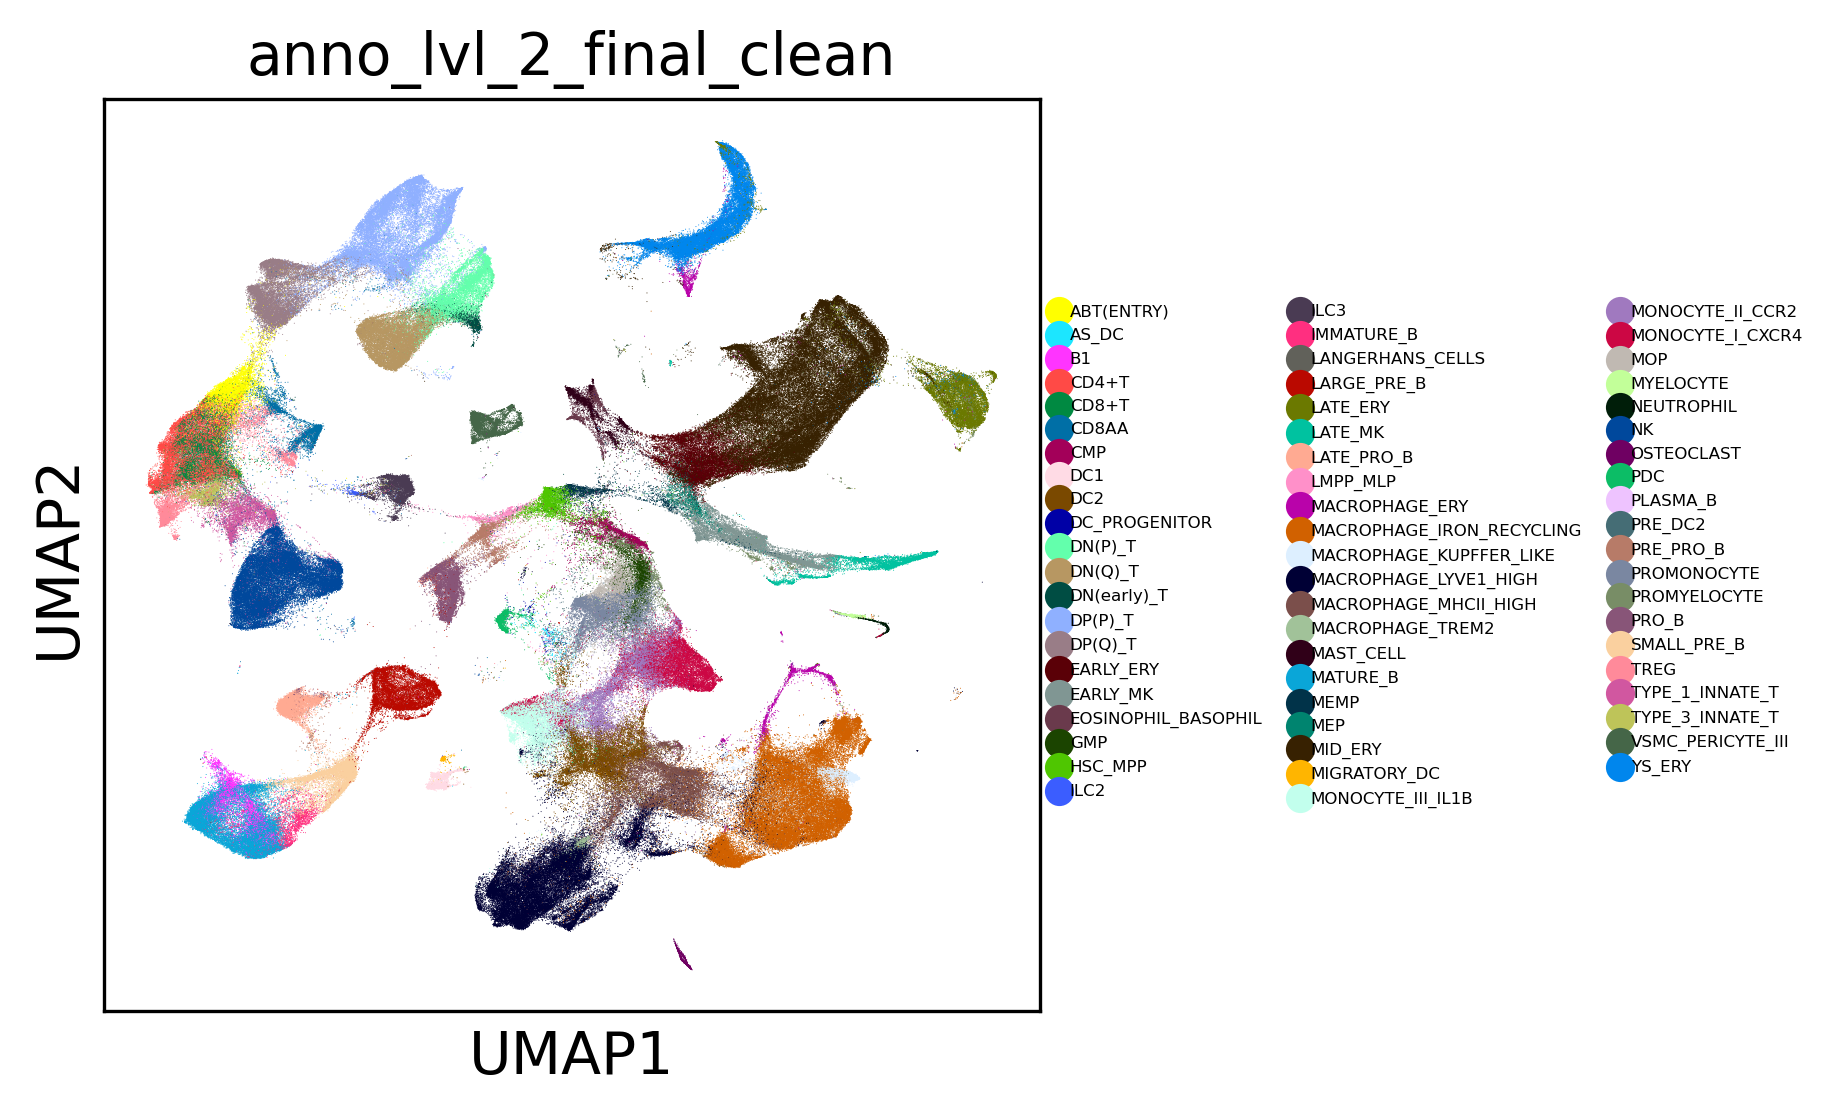

In [11]:
 sc.pl.umap(adata_subset, color=["anno_lvl_2_final_clean"],legend_fontoutline =1,
           legend_fontsize= 4 )

In [12]:
adata_subset.obs['anno_lvl_2_final_clean']

index
FCAImmP7579224-CAGCCGAGTACATCCA           EARLY_ERY
FCAImmP7579224-TGCTACCTCATGTAGC             PRE_DC2
FCAImmP7579224-ACGGCCACAAGCTGAG    MONOCYTE_II_CCR2
FCAImmP7579224-CTAATGGCACTGTGTA         LARGE_PRE_B
FCAImmP7579224-GGAGCAACAATGGACG                 DC1
                                         ...       
FCAImmP7803042-CACAGGCCACGGATAG             MID_ERY
FCAImmP7803042-AGGTCATCAATGAAAC            LATE_ERY
FCAImmP7803042-TGTGTTTCAGGCTGAA            LATE_ERY
FCAImmP7803042-GCTGCGATCCACGTTC             MID_ERY
FCAImmP7803042-TCTCATATCCTATGTT      MACROPHAGE_ERY
Name: anno_lvl_2_final_clean, Length: 528989, dtype: category
Categories (62, object): ['ABT(ENTRY)', 'AS_DC', 'B1', 'CD4+T', ..., 'TYPE_1_INNATE_T', 'TYPE_3_INNATE_T', 'VSMC_PERICYTE_III', 'YS_ERY']

In [13]:
adata = adata_subset
del(adata_subset)

In [14]:
from matplotlib.pyplot import figure
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

In [15]:
import statsmodels.api as sm
from scipy import stats

In [16]:
x = alpha_vals["n"].values
y = alpha_vals["α"].values
x = x.reshape(len(x), 1)
y = y.reshape(len(y), 1)

In [17]:
x2 = sm.add_constant(x)
mod1 = sm.OLS(y, x2).fit()
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.327
Date:                Wed, 06 Mar 2024   Prob (F-statistic):              0.253
Time:                        14:47:38   Log-Likelihood:                 71.493
No. Observations:                  71   AIC:                            -139.0
Df Residuals:                      69   BIC:                            -134.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2324      0.034      6.759      0.0

In [18]:
alpha_vals

,line,cell,type,α_weak,α_strong,α,ωₐ_weak,ωₐ_strong,ωₐ,ωₙₐ,...,β,γ₊,γ₊₊,B,n,color,subline,pvalue,pvalue_strong,pvalue_weak
0,Lymphoid_ALL,ABTENTRY,case,0.028128,0.066996,0.130458,0.003900,0.012452,0.034352,0.219620,...,0.207751,1.793693,1325.550000,0.295478,135,#5F90BBFF,Tcells,0.554446,0.494505,0.647353
1,Myeloid_ALL,AS_DC,case,0.056397,0.107909,0.242764,0.013511,0.028760,0.056808,0.197747,...,0.232218,3.929704,614.181140,0.403588,441,#37474FFF,DCs,0.236763,0.254745,0.458541
2,Lymphoid_ALL,B1,case,0.105381,0.177246,0.361401,0.017592,0.042836,0.078276,0.161841,...,0.234789,6.217220,1220.507775,0.418842,443,#378748FF,Bcells,0.018981,0.035964,0.035964
3,Lymphoid_ALL,CD4+T,case,0.068883,0.115648,0.261965,0.013698,0.021214,0.056278,0.196875,...,0.231139,8.918677,1724.178020,0.412194,286,#2A5783FF,Tcells,0.201798,0.234765,0.280719
4,Lymphoid_ALL,CD8+T,case,0.037159,0.078856,0.158622,0.004274,0.017722,0.032921,0.197931,...,0.219275,6.953491,1254.818386,0.352605,248,#447AA1FF,Tcells,0.492507,0.431568,0.628372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,Lymphoid_ALL,TREG,case,0.114779,0.186712,0.367098,0.024249,0.054321,0.093708,0.175743,...,0.235573,3.762869,1449.573093,0.369414,380,#386592FF,Tcells,0.022977,0.041958,0.022977
67,Lymphoid_ALL,TYPE_1_INNATE_T,case,0.108923,0.241075,0.432212,0.015571,0.063757,0.098425,0.129420,...,0.258350,2.037117,1513.996608,0.526193,216,#00ACC1FF,Innate,0.017982,0.028971,0.025974
68,Lymphoid_ALL,TYPE_3_INNATE_T,case,0.080840,0.133240,0.335655,0.018577,0.037668,0.086880,0.230953,...,0.198838,5.573837,892.155335,0.372607,276,#0097A7FF,Innate,0.084915,0.168831,0.176823
69,MegaK_Ery,VSMC_PERICYTE_III,case,0.048277,0.076998,0.148107,0.005922,0.013967,0.026463,0.193682,...,0.226626,2.924347,467.589929,0.396314,449,#C7203CFF,Stromal,0.594406,0.485514,0.589411


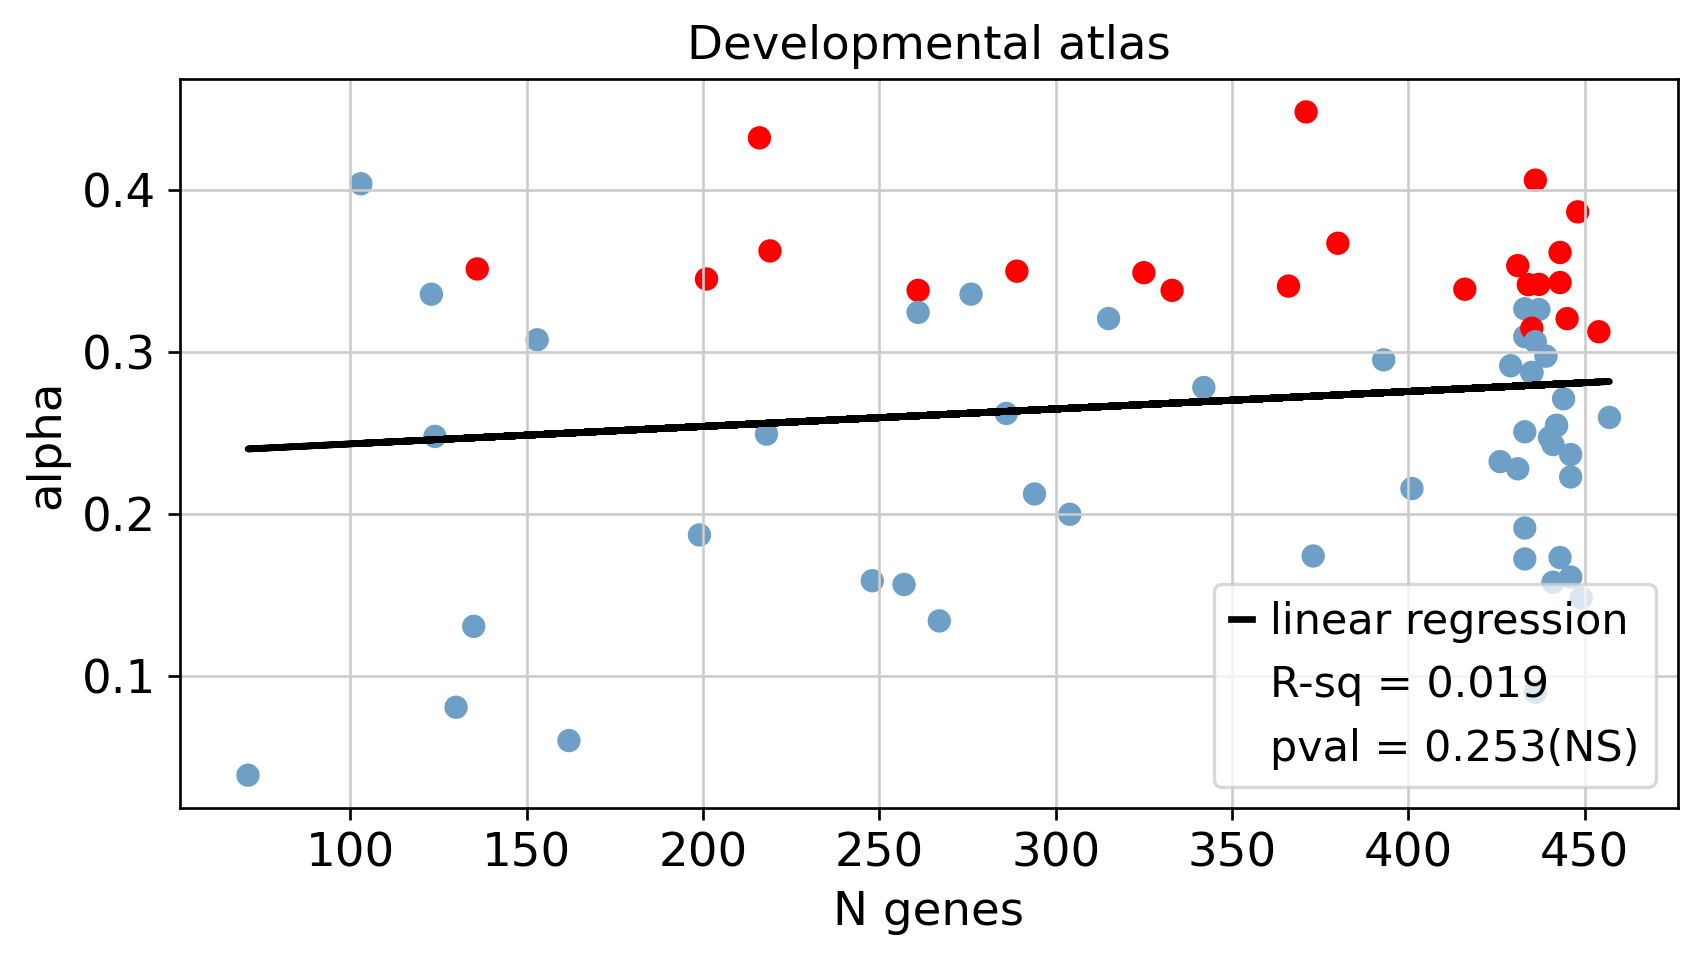

In [19]:
alpha_pval = np.where(alpha_vals["pvalue"] < 0.05, "red", "#6e9fc6")
figure(figsize=(8, 4), dpi=120)
plt.scatter(alpha_vals["n"], alpha_vals["α"], color = alpha_pval )
plt.plot(x, mod1.fittedvalues, color='black', linewidth=2, label="linear regression")
# Create empty plot with blank marker containing the extra label
plt.plot([], [], ' ', label="R-sq = 0.019")
plt.plot([], [], ' ', label="pval = 0.253(NS)")
#plt.xscale('log')
plt.title("Developmental atlas")
plt.xlabel("N genes")
plt.ylabel("alpha")
plt.legend(framealpha=0.75, frameon=True);
plt.show()

<AxesSubplot:title={'center':'adata'}>

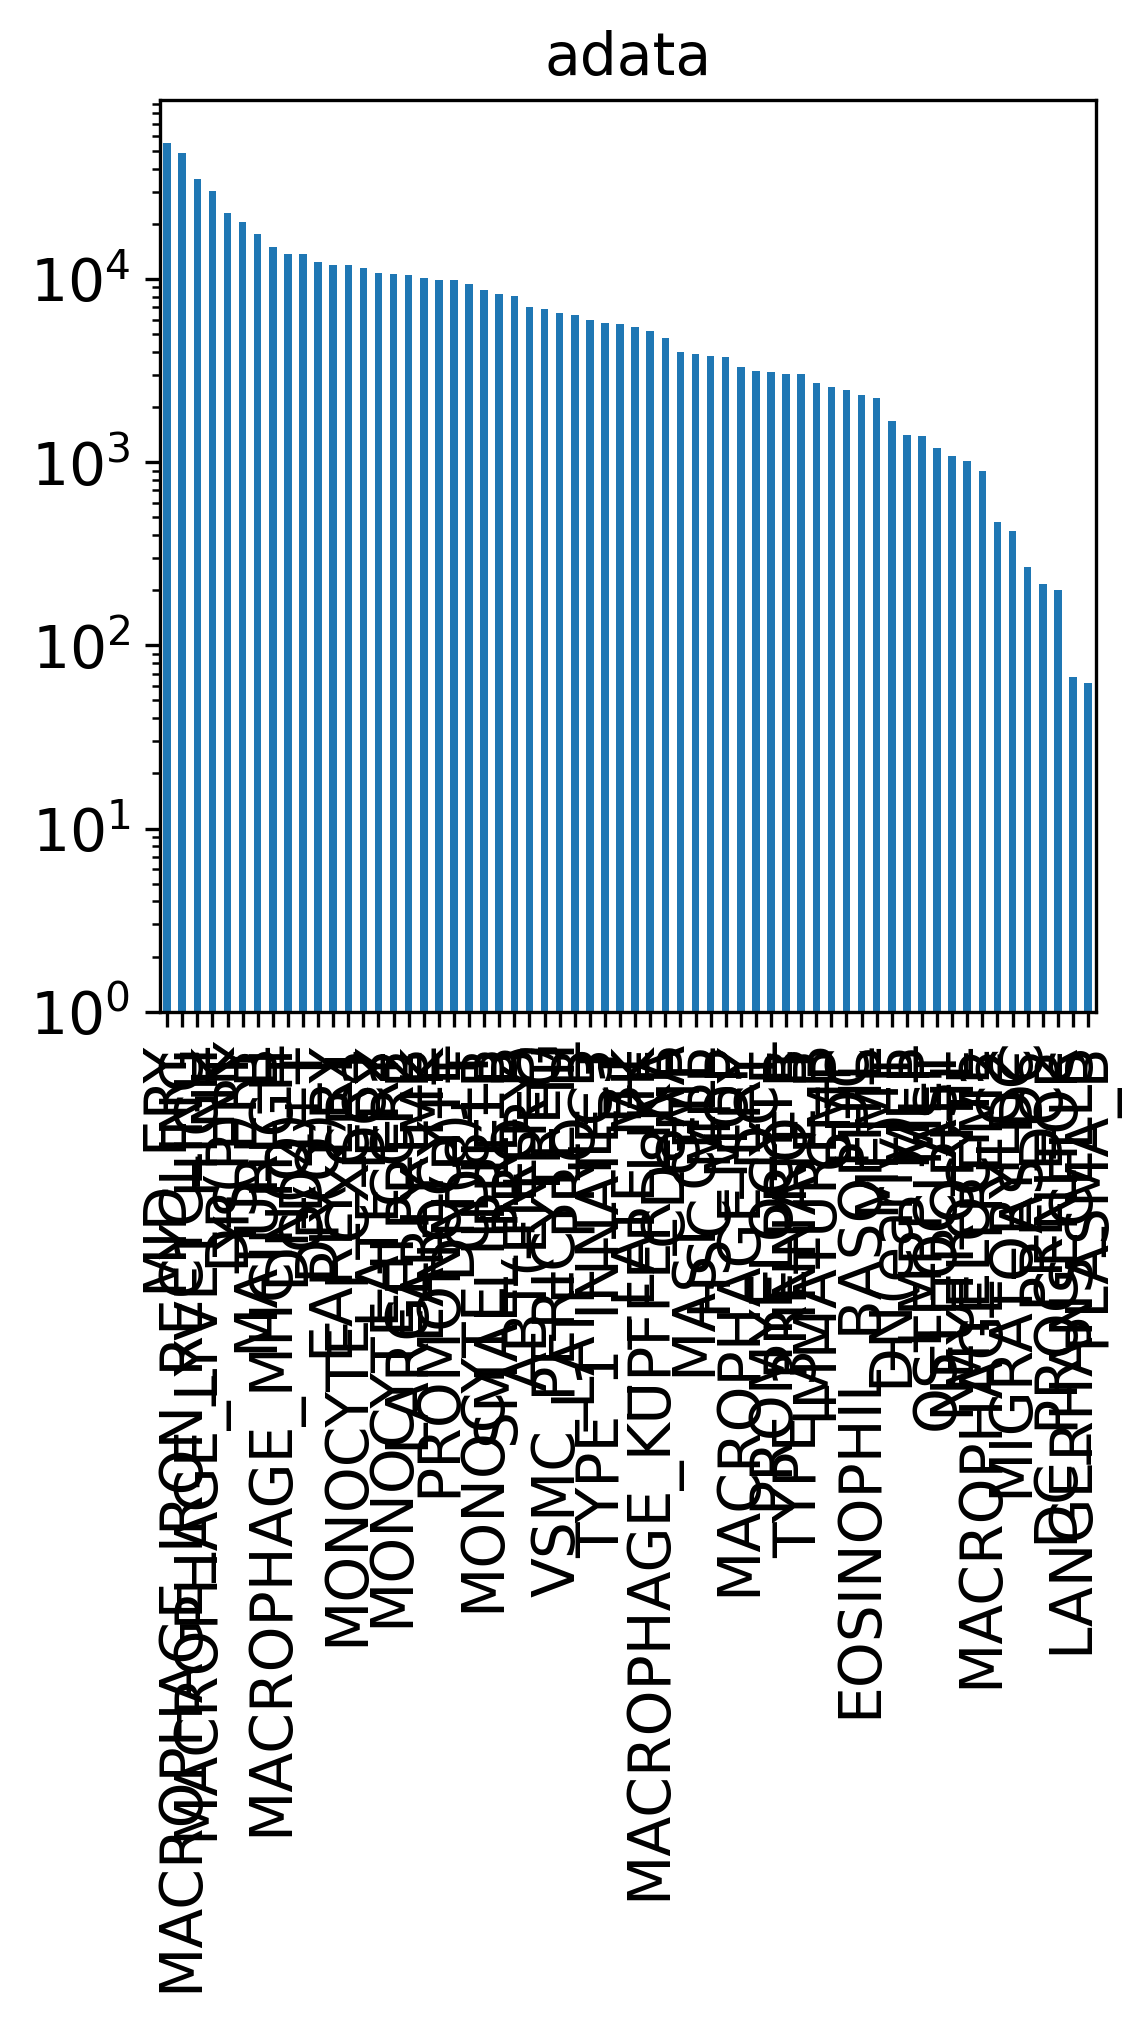

In [22]:
adata.obs['anno_lvl_2_final_clean'].value_counts().plot(kind='bar', log="y",
                                                        grid=False, title='adata')


In [23]:
import re

df = adata.obs['anno_lvl_2_final_clean'].value_counts()

d = {'celltypes': "celltypes", 'counts': df.values}
df2 = pd.DataFrame(data=d)


In [24]:
for i in range(len(df.index.values)) :
    x = re.sub(r'\/','_',str(df.index.values[i]))
    x =  re.sub(r' ','_',x)
    x =  re.sub(r'\(','',x)
    x =  re.sub(r'\)','',x)
    df2["celltypes"][i] = x
   # print(i)

/home/irepan/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
df2["α"] = 0.0
df2["pvalue"] = 0.0
for i in range(len(df2["celltypes"])) :
    #print(df2["celltypes"][i])
    alpha = alpha_vals["α"][alpha_vals["cell"] == df2["celltypes"][i]]
    pval  = alpha_vals["pvalue"][alpha_vals["cell"] == df2["celltypes"][i]]
    #print(alpha)
    df2["α"][i] = alpha
    df2["pvalue"][i] = pval

/home/irepan/.local/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/irepan/.local/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/home/irepan/anaconda3/envs/pyscenic/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(index

In [26]:
#df2["celtypes_2"] = df2["celltypes"]
for i in range(len(df2["α"].values)) :
    # For each celltype with na value there are 2 alpha values as
    # it was compared against 2 different compartments 
    if(np.isnan(df2["α"].values[i])) :
        x = df2["celltypes"].values[i]
        mean_alpha = 0
        cont = 0
        # look for the different alpha values and get the mean
        for j in range(len(alpha_vals["cell"])) :
            y = alpha_vals["cell"][j]
            if x in y:
                #print(y, alpha_vals["α"][j])
                mean_alpha = mean_alpha + alpha_vals["α"][j]
                cont = cont + 1
                df2.loc[len(df2)] = [y, df2["counts"].values[i],  alpha_vals["α"][j], alpha_vals["pvalue"][j]]  # adding a row

In [27]:
df2.dropna(axis = 0, how = 'any', inplace = True)

In [28]:
df2.loc[10:20]

,celltypes,counts,α,pvalue
10,DPQ_T,12390,0.199672,0.295704
11,EARLY_ERY,11897,0.309406,0.074925
12,MONOCYTE_I_CXCR4,11891,0.212231,0.331668
13,DC2,11491,0.277988,0.129870
14,LATE_ERY,10814,0.247771,0.222777
15,MONOCYTE_II_CCR2,10660,0.186929,0.428571
16,LARGE_PRE_B,10468,0.254695,0.130869
20,CD8+T,9369,0.158622,0.492507


In [29]:
x = df2["counts"].values
y = df2["α"].values
x = x.reshape(len(x), 1)
y = y.reshape(len(y), 1)

In [30]:
x2 = sm.add_constant(x)
mod1 = sm.OLS(y, x2).fit()
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.014
Method:                 Least Squares   F-statistic:                   0.01191
Date:                Wed, 06 Mar 2024   Prob (F-statistic):              0.913
Time:                        14:18:53   Log-Likelihood:                 73.155
No. Observations:                  73   AIC:                            -142.3
Df Residuals:                      71   BIC:                            -137.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2701      0.013     20.020      0.0

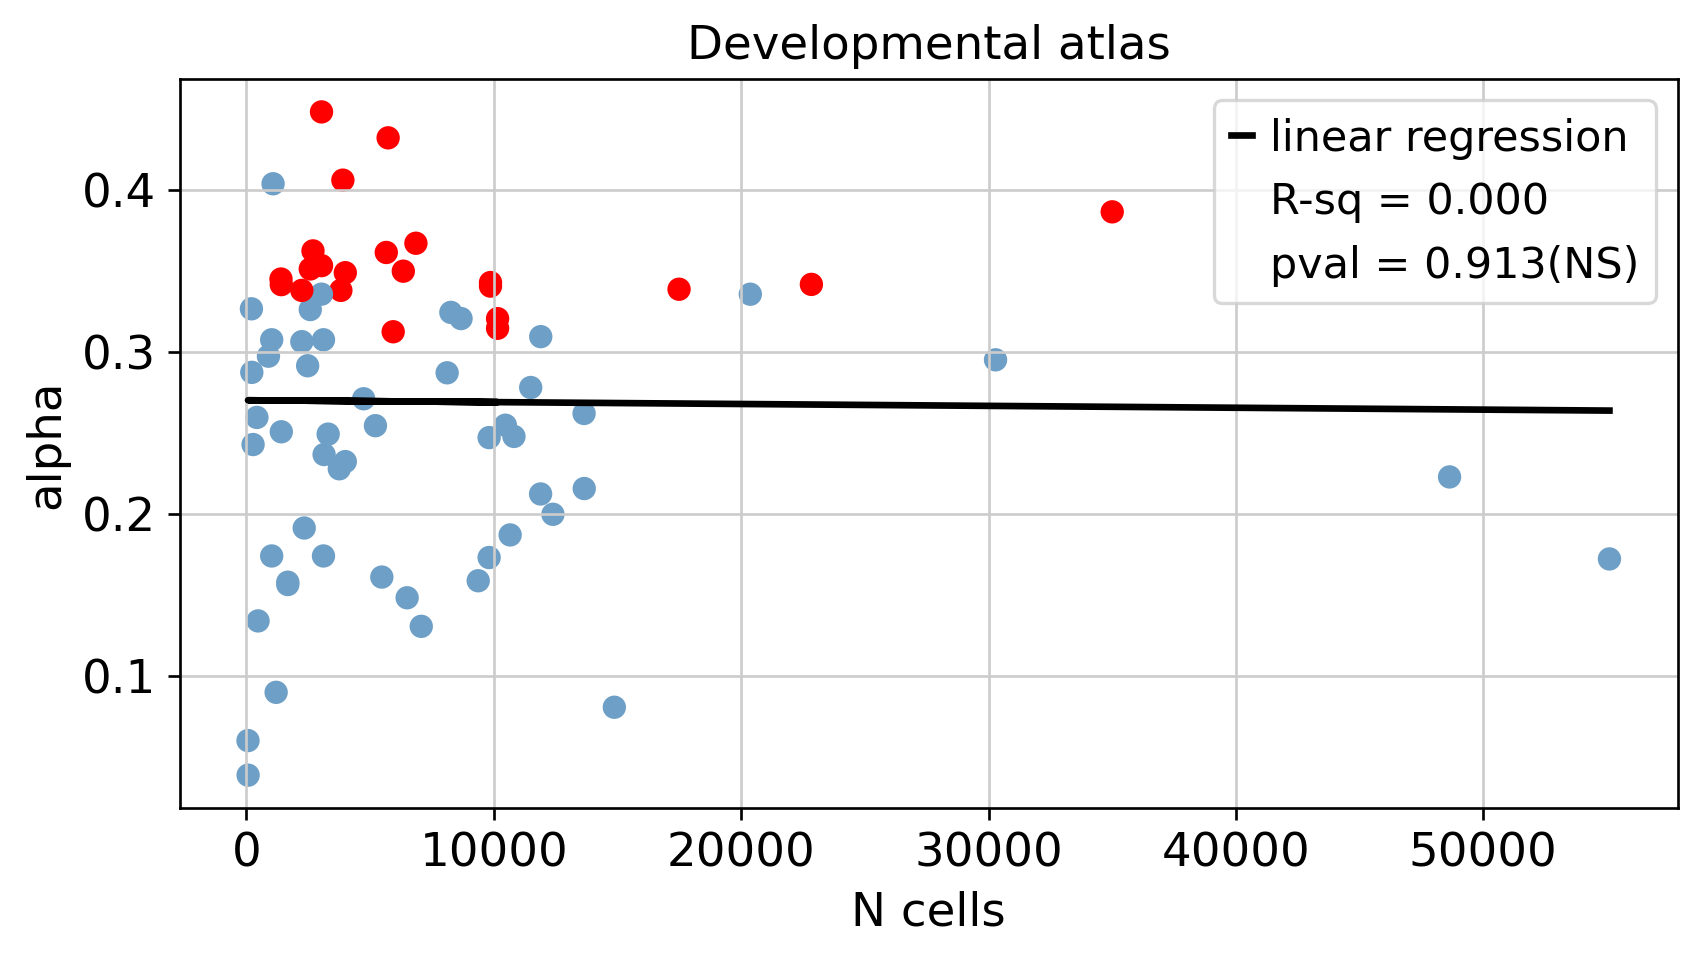

In [32]:
alpha_pval = np.where(df2["pvalue"] < 0.05, "red", "#6e9fc6")
figure(figsize=(8, 4), dpi=120)
plt.scatter(df2["counts"], df2["α"], color = alpha_pval)
plt.plot(x, mod1.fittedvalues, color='black', linewidth=2, label="linear regression")
# Create empty plot with blank marker containing the extra label
plt.plot([], [], ' ', label="R-sq = 0.000")
plt.plot([], [], ' ', label="pval = 0.913(NS)")
#plt.xscale('log')
plt.title("Developmental atlas")
plt.xlabel("N cells")
plt.ylabel("alpha")
plt.legend(framealpha=0.75, frameon=True);
plt.show()

In [33]:
df2

,celltypes,counts,α,pvalue
0,MID_ERY,55104,0.172092,0.452547
1,MACROPHAGE_IRON_RECYCLING,48640,0.222753,0.227772
2,MACROPHAGE_LYVE1_HIGH,35001,0.386497,0.008991
3,NK,30284,0.295088,0.095904
4,DPP_T,22839,0.341685,0.028971
...,...,...,...,...
79,DNearly_T_Lymphoid_ALL,1670,0.157724,0.506993
80,MEP_HSC_progenitors,1408,0.250639,0.168831
81,MEP_MegaK_Ery,1408,0.341545,0.033467
82,PROMYELOCYTE_HSC_progenitors,1019,0.307469,0.150849


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


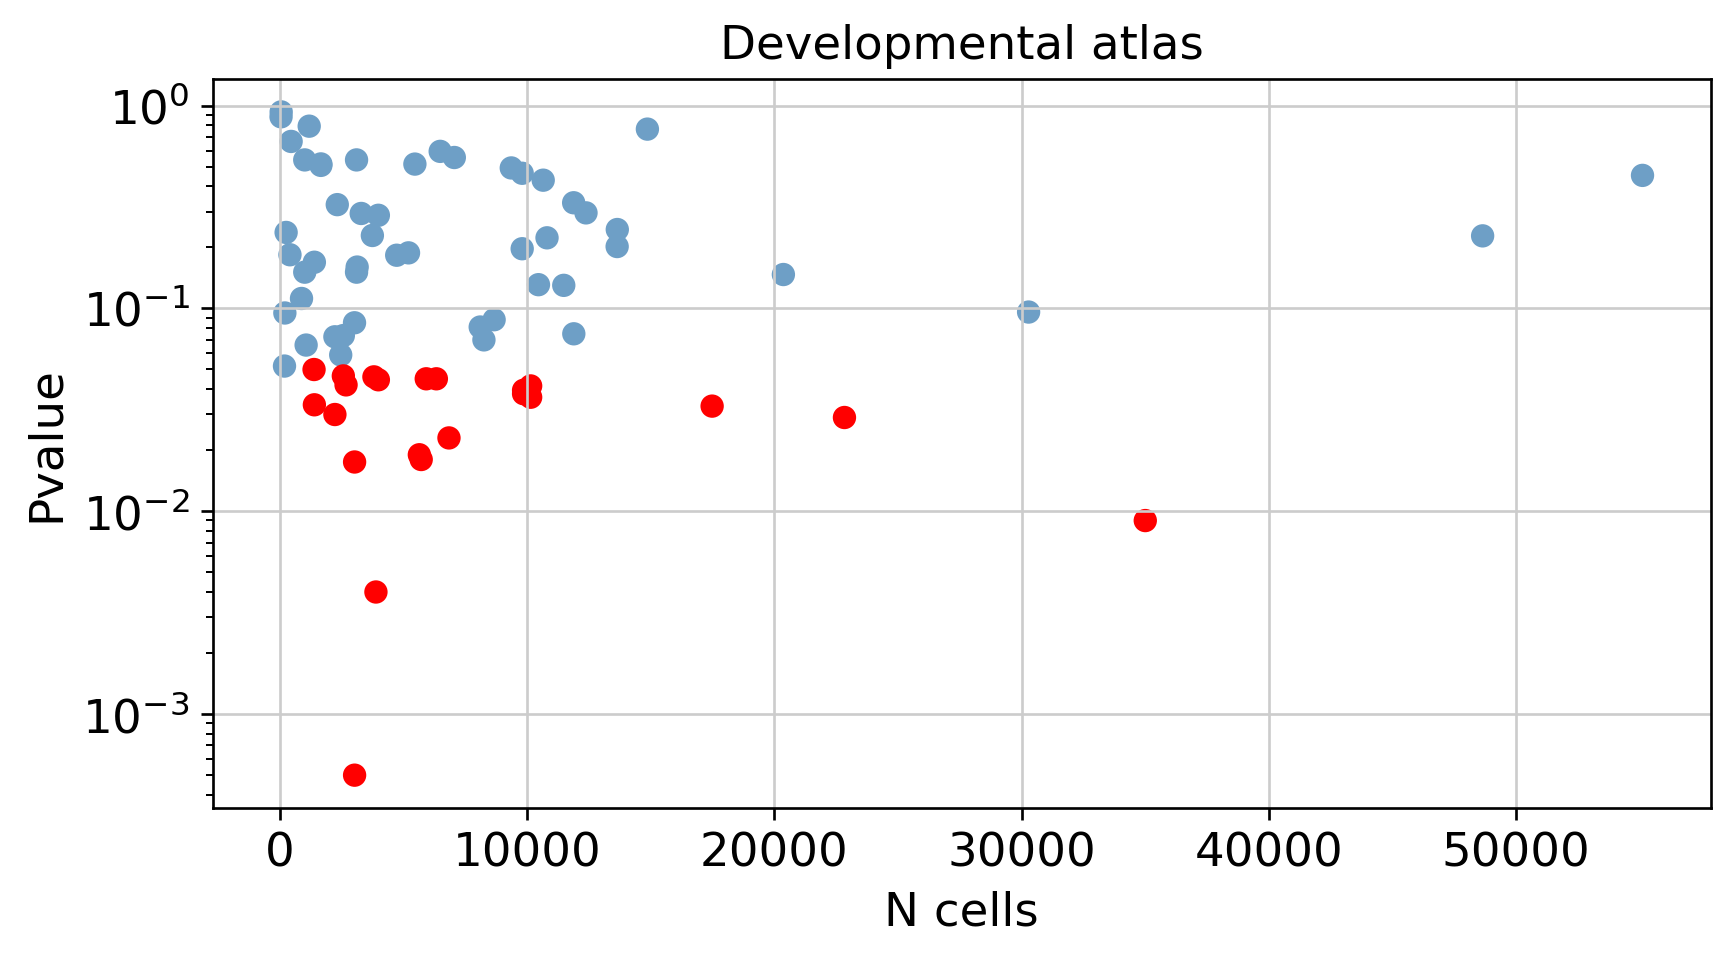

In [34]:
figure(figsize=(8, 4), dpi=120)
plt.scatter(df2["counts"], df2["pvalue"], color = alpha_pval)
#plt.plot(x, mod1.fittedvalues, color='black', linewidth=2, label="linear regression")
# Create empty plot with blank marker containing the extra label
#plt.plot([], [], ' ', label="R-sq = 0.001")
#plt.plot([], [], ' ', label="pval = 0.763(NS)")
plt.yscale('log')
plt.title("Developmental atlas")
plt.xlabel("N cells")
plt.ylabel("Pvalue")
plt.legend(framealpha=1, frameon=False);
plt.show()